In [364]:
from sklearn.datasets import load_digits
digits = load_digits()


In [365]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [366]:
X = digits.data
Y = digits.target

print(X, len(X))
print(Y, len(Y))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 1797
[0 1 2 ... 8 9 8] 1797


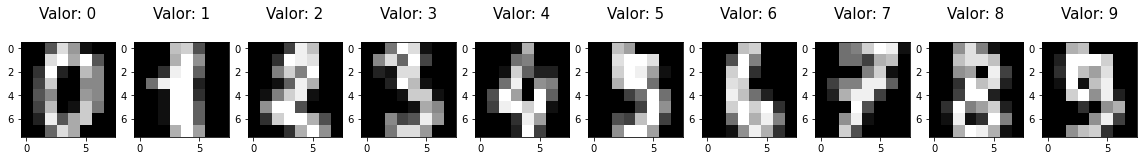

In [367]:
import numpy as np 
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))

inicial = 0

for index, (imagen, etiqueta) in enumerate(zip(X[inicial:inicial+10], Y[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (8,8)), cmap=plt.cm.gray)
 plt.title('Valor: %i\n' % etiqueta, fontsize = 15)

Programar un clasificador utilizando regresión logística




In [368]:
import random
valores=np.random.randint(0,10,size=(1,2))
#valores=np.array([1, 4])
valores=sum(valores)
#print(valores)
while valores[0]==valores[1]:
    valores=np.random.randint(0,9,size=(1,2))
    valores=sum(valores)

print(valores)


[5 1]


In [369]:
valy=np.where((Y==valores[0]) | (Y==valores[1]))
valx=X[valy]
#print(valx)
[renx,colx]=valx.shape
valy_f=np.asarray(Y[valy])

valy_f=valy_f.T
print(valy_f.shape)
print(valx.shape)
print(valy_f)

(364,)
(364, 64)
[1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5
 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5
 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5
 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1
 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1
 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1
 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5
 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1
 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1
 5 1 5 5 5 1 5 1 5 1 5 5 5 5 1 5 1 1 1 5 5 1 1 1 1 1 5 1 5 5 5]


Agregar columna de 1s



In [370]:
valx=np.insert(valx,0,np.ones([len(valx)],dtype=int),axis=1)

[renx,colx]=valx.shape
print(renx,colx)

364 65


Cambiar etiquetas de Y por 0s y 1s

In [371]:
print(valy_f.shape)
for q in range(renx):
  if valy_f[q]==valores[0]:
    valy_f[q]=0
  else:
    valy_f[q]=1

valy_f=np.reshape(valy_f,(renx,1))
print(valy_f.shape)


(364,)
(364, 1)


Proponer thetas aleatorias

In [372]:

thetas=np.random.rand(colx,1)
print(thetas.shape)

(65, 1)


Calcular la funcion $X.\theta$

In [373]:
xt=np.dot(valx,thetas)
xt.shape

(364, 1)

proponer sigma

In [374]:
def sigma(xport): #Hipótesis
  s=1/(1+np.exp(-(xport)))
  return s

print(sigma(xt).shape)

(364, 1)


Aplicar gradiente con matrices caso general.

(364, 1) (364, 1)
(364, 65)
[0.00010981]


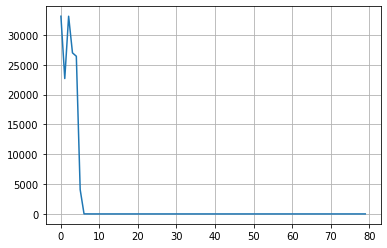

In [375]:
import matplotlib.pyplot as plt
epocas=80
alpha=0.1
m=renx
print(xt.shape,valy_f.shape)
print(valx.shape)
msemat=[]
epocmat=[]
for epoca in range(epocas):   ##
  thetas=thetas-alpha*(1/m)*((sigma(xt)-valy_f).T.dot(valx)).T #Importante para que funcionara
  mse=sum(sigma(xt)-valy_f)**2
  msemat.append(mse)
  epocmat.append(epoca)
  xt=np.dot(valx,thetas)
  #print(mse)
plt.plot(epocmat,msemat)
plt.grid()
print(msemat[-1])

# Parte 2: entrenamiento con división de valores 60 20 20

In [376]:
#aplicando regla de 60 20 20 
#Cambiando variables
X_r1=valx# X
thetas_r1=thetas# Theta
y_r1=valy_f# y
[renx_r1,colx_r1]=X_r1.shape
m_r1=renx_r1# m 

print(X_r1.shape)
print(y_r1.shape)
import random

#division de valores mediante quitar y copiar valores
def div_data(x,y,porcentajes):
  x_total=x
  [rowx,colx]=x_total.shape
  y_total=y
  ll=rowx
  x_train=np.empty((0,colx),dtype=float)
  y_train=np.empty((0,1),dtype=float)
  x_ver=np.empty((0,colx),dtype=float)
  y_ver=np.empty((0,1),dtype=float)
  x_test=np.empty((0,colx),dtype=float)
  y_test=np.empty((0,1),dtype=float)
  ##Datos de entrenamiento
  for ii in range(round(ll*porcentajes[0]/100)):
    p=random.randint(0,len(x_total)-1)
    ## Para x
    val_el=x_total[p,:]
    x_total=np.delete(x_total,p,0)
    x_train=np.vstack([x_train,val_el])
    ##para y
    val_el=y_total[p,:]
    y_total=np.delete(y_total,p,0)
    y_train=np.vstack([y_train,val_el])
  ## Datos de verificación
  for ii in range(round(ll*porcentajes[1]/100)):
    p=random.randint(0,len(x_total)-1)
    ## Para x
    val_el=x_total[p,:]
    x_total=np.delete(x_total,p,0)
    x_ver=np.vstack([x_ver,val_el])
    ##para y
    val_el=y_total[p,:]
    y_total=np.delete(y_total,p,0)
    y_ver=np.vstack([y_ver,val_el])
  
  ## La parte de test, es el resultado de x y y total
  x_test=x_total
  y_test=y_total

  return [x_train,y_train,x_ver,y_ver,x_test,y_test]

[x_train,y_train,x_ver,y_ver,x_test,y_test]=div_data(X_r1,y_r1,[60, 20, 20])

(364, 65)
(364, 1)


aplicación de Gradiente descendiente para 60 20 20

Resultados del entrenamiento MSE:  1.8121885665324867e-05
Los resultados de la verificación son:  100.0 % de precisión
Los resultados de test son:  98.63013698630137 % de precisión


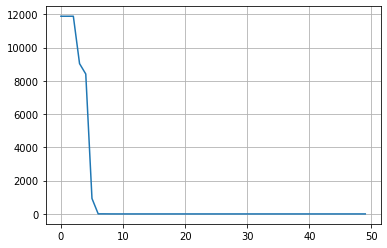

In [377]:
alpha_r1=0.01# Alpha
epocas=50
t_1=thetas=np.random.rand(colx_r1,1)
def g_epocas(x,y,thetas,epocas,apha):  ##Entrenamiento
  msemat=[]
  epocmat=[]
  [rowx,colx]=x.shape
  mse=0
  xt=np.dot(x,thetas)
  m=len(x)
  for epoca in range(epocas):
    thetas=thetas-alpha*(1/m)*((sigma(xt)-y).T.dot(x)).T
    mse=sum(sigma(xt)-y)**2
    msemat.append(mse)
    epocmat.append(epoca)
    xt=np.dot(x,thetas)   
  plt.plot(epocmat,msemat)
  plt.grid()
  print('Resultados del entrenamiento MSE: ',float(msemat[-1]))
  return thetas

def prueba(x,y,thetas):
  acc=0
  aciertos=0
  posibles=len(x)
  xt=np.dot(x,thetas)
  for ii in range(len(x)):
    
    p_r=sigma(xt[ii,:]) 
    #print(p_r)
    if p_r>0.5:
      p_r=1
    else:
      p_r=0
    
    if p_r==y[ii,0]:
      aciertos+=1

  acc=(aciertos/posibles)*100
  return acc





thetas_fin=g_epocas(x_train,y_train,t_1,epocas,alpha) #Thetas despues de entrenamiento
print('Los resultados de la verificación son: ',prueba(x_ver,y_ver,thetas_fin),'% de precisión')
print('Los resultados de test son: ',prueba(x_test,y_test,thetas_fin),'% de precisión')




# Método K-Folds con K=4

In [381]:
#aplicando regla k-folds
#Cambiando variables
X_r2=valx# X
y_r2=valy_f# y
k=5  ### Cantidad de divisiones
def k_folds(x,y,k):  #Función que únicamente divide los grupos
  x_total=x
  [rowx,colx]=x_total.shape
  y_total=y
  ll=rowx
  x_group=np.empty((0,colx),dtype=float)
  y_group=np.empty((0,1),dtype=float)
  resx=[]
  resy=[]
  for div in range(k):
    x_group=np.empty((0,colx),dtype=float)
    y_group=np.empty((0,1),dtype=float)
    for ii in range(round(np.trunc(len(x)/k))):
      p=np.random.randint(0,len(x_total))
      val_el=x_total[p,:]   #Para x
      x_total=np.delete(x_total,p,0)
      x_group=np.vstack([x_group,val_el])
      ##Para y
      val_el=y_total[p,:]
      y_total=np.delete(y_total,p,0)
      y_group=np.vstack([y_group,val_el])
    resx.append(x_group)
    resy.append(y_group)
  return [resx,resy]

[g_x,g_y]=k_folds(X_r2,y_r2,k)
print(len(g_x))

5


# Muestra de resultados de K-folds

segmento omitido 0
Resultados del entrenamiento MSE:  3.148296868423244e-05
Los resultados de la verificación son:  100.0 % de precisión
segmento omitido 1
Resultados del entrenamiento MSE:  0.0008728879248555085
Los resultados de la verificación son:  100.0 % de precisión
segmento omitido 2
Resultados del entrenamiento MSE:  4.493979357609134e-05
Los resultados de la verificación son:  100.0 % de precisión
segmento omitido 3
Resultados del entrenamiento MSE:  3.8508174172384236e-05
Los resultados de la verificación son:  100.0 % de precisión
segmento omitido 4
Resultados del entrenamiento MSE:  0.0004945740365993505
Los resultados de la verificación son:  100.0 % de precisión


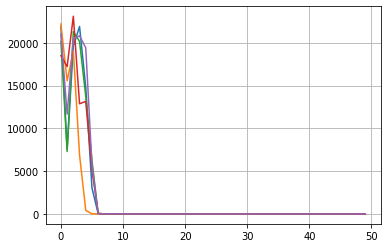

In [382]:

alpha_r1=0.001# Alpha
epocas=50
t_1=thetas=np.random.rand(colx_r1,1)
[renx_r2,colx_r2]=X_r1.shape
m_r2=renx_r2# m 

########### Prueba de valores de K ###
for rr in range(k):
  gr_tempx=g_x
  gr_tempy=g_y
  gr_verx=gr_tempx[rr]
  gr_very=gr_tempy[rr]
  gr_trainy=np.empty((0,1),dtype=float)
  gr_trainx=np.empty((0,colx),dtype=float)
  for eliminate in range(k):
    if eliminate==rr:
      print('segmento omitido',eliminate)
    else:
      gr_trainx=np.vstack([gr_trainx,gr_tempx[eliminate]])
      gr_trainy=np.vstack([gr_trainy,gr_tempy[eliminate]])
  
  t_1=thetas=np.random.rand(colx_r1,1)
  t_n=g_epocas(gr_trainx,gr_trainy,t_1,epocas,alpha)
  prueba(gr_verx,gr_very,t_n)
  print('Los resultados de la verificación son: ',prueba(x_ver,y_ver,thetas_fin),'% de precisión')







In [380]:
los=np.array(g_x[1])
print(los.shape)

(91, 65)
